In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem Statement: 

Implement a KNN model to classify the animals in to categories



In [107]:
df  = pd.read_csv('Zoo.csv')

In [108]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [125]:
df = df.drop('animal name',axis=1)

In [126]:
df.drop_duplicates(subset='animal name', keep='first', inplace=True)


KeyError: Index(['animal name'], dtype='object')

In [ ]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


#### Descriptive Analysis

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      100 non-null    int64
 1   feathers  100 non-null    int64
 2   eggs      100 non-null    int64
 3   milk      100 non-null    int64
 4   airborne  100 non-null    int64
 5   aquatic   100 non-null    int64
 6   predator  100 non-null    int64
 7   toothed   100 non-null    int64
 8   backbone  100 non-null    int64
 9   breathes  100 non-null    int64
 10  venomous  100 non-null    int64
 11  fins      100 non-null    int64
 12  legs      100 non-null    int64
 13  tail      100 non-null    int64
 14  domestic  100 non-null    int64
 15  catsize   100 non-null    int64
 16  type      100 non-null    int64
dtypes: int64(17)
memory usage: 14.1 KB


In [128]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.43000,0.200000,0.580000,0.410000,0.240000,0.350000,0.55,0.600000,0.820000,0.79000,0.070000,0.170000,2.830000,0.750000,0.130000,0.440000,2.810000
std,0.49757,0.402015,0.496045,0.494311,0.429235,0.479372,0.50,0.492366,0.386123,0.40936,0.256432,0.377525,2.040276,0.435194,0.337998,0.498888,2.101923
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.000000,0.000000,2.000000,0.750000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000
75%,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [129]:
df.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [130]:
df.duplicated().sum()

42

In [131]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [132]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     3
Name: type, dtype: int64

<AxesSubplot:>

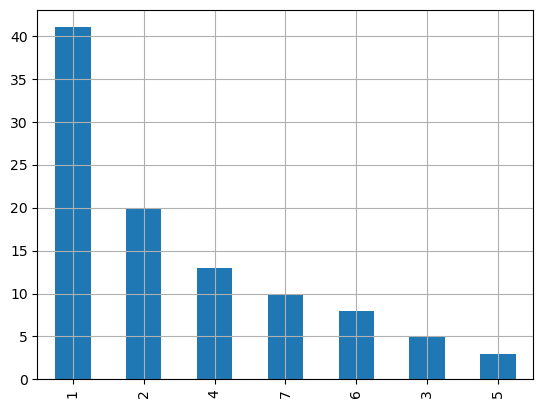

In [133]:
df['type'].value_counts().plot(kind = 'bar', grid=True,)

As shown in the graphs above, highest number of animals available in Zoo are Type 1 followed by 2, 4 and 7 respectively

<AxesSubplot:ylabel='Density'>

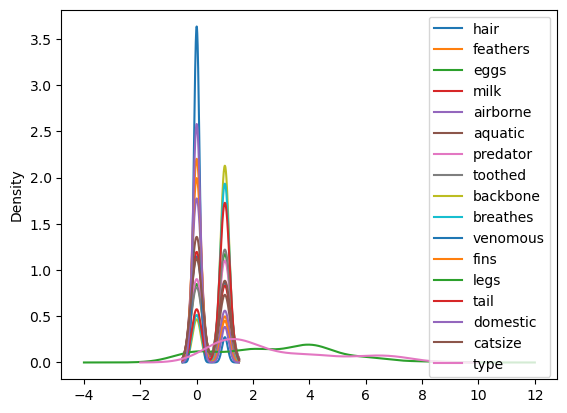

In [134]:
df.plot(kind='density')

hair           AxesSubplot(0.125,0.747241;0.168478x0.132759)
feathers    AxesSubplot(0.327174,0.747241;0.168478x0.132759)
eggs        AxesSubplot(0.529348,0.747241;0.168478x0.132759)
milk        AxesSubplot(0.731522,0.747241;0.168478x0.132759)
airborne       AxesSubplot(0.125,0.587931;0.168478x0.132759)
aquatic     AxesSubplot(0.327174,0.587931;0.168478x0.132759)
predator    AxesSubplot(0.529348,0.587931;0.168478x0.132759)
toothed     AxesSubplot(0.731522,0.587931;0.168478x0.132759)
backbone       AxesSubplot(0.125,0.428621;0.168478x0.132759)
breathes    AxesSubplot(0.327174,0.428621;0.168478x0.132759)
venomous    AxesSubplot(0.529348,0.428621;0.168478x0.132759)
fins        AxesSubplot(0.731522,0.428621;0.168478x0.132759)
legs            AxesSubplot(0.125,0.26931;0.168478x0.132759)
tail         AxesSubplot(0.327174,0.26931;0.168478x0.132759)
domestic     AxesSubplot(0.529348,0.26931;0.168478x0.132759)
catsize      AxesSubplot(0.731522,0.26931;0.168478x0.132759)
type               AxesS

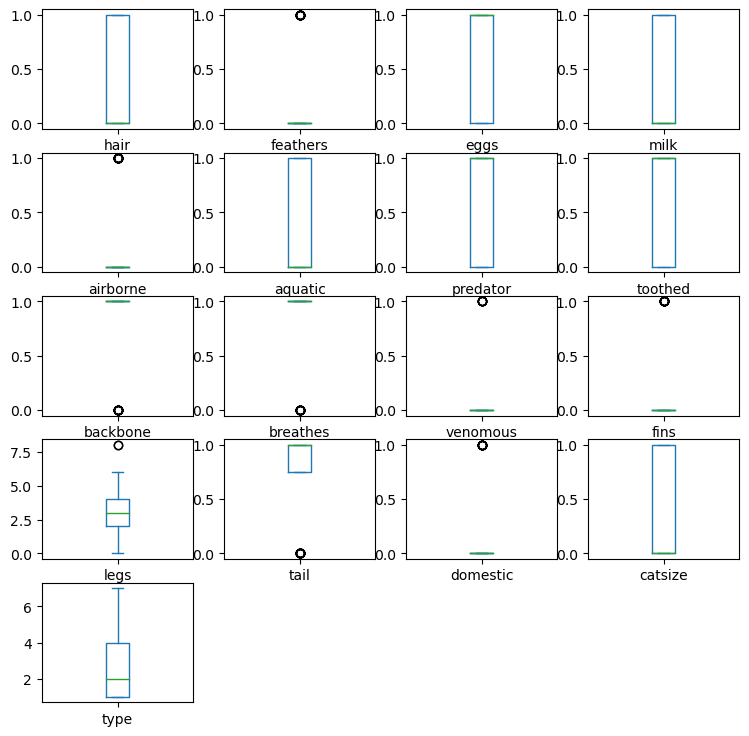

In [135]:
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(9,9))

<AxesSubplot:>

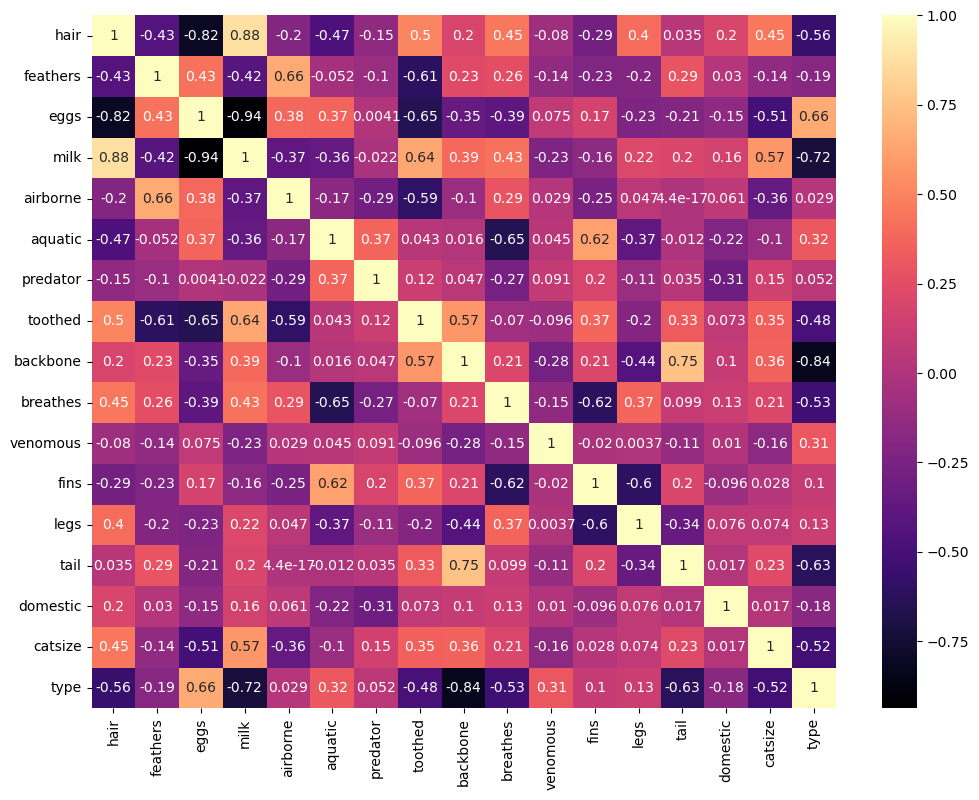

In [136]:
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, cmap="magma")

In [137]:
from sklearn.model_selection import train_test_split
y = df['type']
X = df.drop('type',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.23, random_state=2)


In [138]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
74,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0


In [140]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=11)
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

#### 

In [145]:
y_pred = kn.predict(X_test)
y_test.shape

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(23,)

In [147]:
y_pred

array([1, 1, 2, 6, 2, 2, 4, 1, 1, 4, 2, 1, 4, 5, 1, 2, 1, 6, 4, 4, 1, 2,
       6])

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7391304347826086

In [159]:
def acc_score(X_train, y_train, X_test, y_test):
    k_values = list(range(1, 25))  
    accuracy_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores




In [167]:
acc = acc_score(X_train, y_train, X_test, y_test)
result_df['k'] = list(range(1, 25))
result_df['Accuracy'] = acc_score(X_train, y_train, X_test, y_test)
result_df.sort_values('Accuracy' ,ascending=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,k,Accuracy
0,1,0.913043
1,2,0.913043
2,3,0.869565
3,4,0.826087
19,20,0.739130
18,19,0.739130
17,18,0.739130
16,17,0.739130
15,16,0.739130
14,15,0.739130


#### We can use the thumb rule of sqrt(data points) = 10, thus taking value of k=10, and we can get a overall accuracy

In [171]:
knnn = KNeighborsClassifier(n_neighbors=10)
knnn.fit(X_train,y_train)
p = knnn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [172]:
accuracy_score(y_test,p)

0.7391304347826086

In [175]:
from sklearn.model_selection import cross_val_score

k_values = list(range(2, 26))

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this beh

In [176]:
best_k

3